# **Bibliotecas necessárias**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
import pickle

from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import Xception

# **Baixando e processando dados**

In [ ]:
!unzip "/content/drive/MyDrive/DATA_HELI/DATA.zip" -d "/content"

In [ ]:
DATADIR = "/content/DATA"
classes = ['MANGA', 'BANANA']

In [ ]:
data = []
IMG_SIZE=224

for category in classes:
      path = os.path.join(DATADIR, category) # Vai listar os caminhos que serão seguidos das pastas de imagens com as classe pré definidas;
      label = classes.index(category)
      for image in os.listdir(path):
          img = cv2.imread(os.path.join(path, image))  # Utilizando o OpenCV para carregar as imagens;
          new_img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) # Utilizando o OpenCV para redimensionar o tamanho das imagens;
          data.append([new_img, label])
          #plt.imshow(new_img)   
          #break

In [ ]:
len(data)

685

In [ ]:
random.shuffle(data)

In [ ]:
data[600]

In [ ]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [ ]:
X_train = np.array(X)
y_train = np.array(y)
len(X_train)

685

In [ ]:
print(X_train.shape)
print(y_train.shape)

(685, 224, 224, 3)
(685,)


In [ ]:
X_train = X_train/255

In [ ]:
X_train.shape # (682, 224, 224, 3) (quantidade de imagens, tamanho, tamanho, 1 ou 3)

(685, 224, 224, 3)

In [ ]:
pickle.dump(X_train, open('X_train.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))

# Salvos os dados processados

In [ ]:
!cp X_train.pkl '/content/drive/MyDrive/DATA_HELI'
!cp y_train.pkl '/content/drive/MyDrive/DATA_HELI' 

# Copiados os dados processados no Drive, eles podem ser apenas carregados a partir daqui com Pickle;

# **Carregar dados em pickle**

In [ ]:
!cp /content/drive/MyDrive/DATA_HELI/X_train.pkl '/content' 
!cp /content/drive/MyDrive/DATA_HELI/y_train.pkl '/content'  

In [ ]:
X_train = pickle.load(open('X_train.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))

# **MODELO KERAS**

In [ ]:
models = Xception(input_shape=X_train.shape[1:], weights='imagenet', include_top=False) 

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
models.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in models.layers: 
  layer.trainable = False

In [ ]:
x = Flatten()(models.output) 
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=models.input, outputs=prediction)
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs = 5, validation_split=0.1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

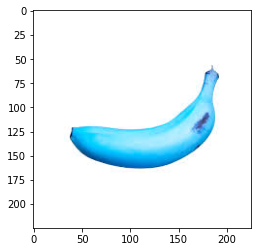

In [ ]:
img_banana = cv2.imread('/content/banana.jpeg')
plt.imshow(img_banana)

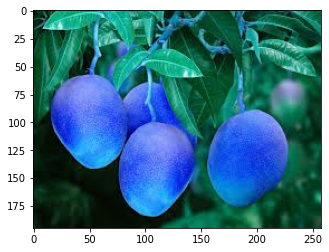

In [ ]:
img_manga = cv2.imread('/content/manga.jpeg')
plt.imshow(img_manga)

In [ ]:
IMG_SIZE = 224
classes = ['MANGA', 'BANANA']

img_test0 = cv2.imread('/content/banana.jpeg')
new_test0 = cv2.resize(img_test0, (IMG_SIZE, IMG_SIZE))
new_test0 = new_test0.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction = model.predict(new_test0)
label = classes[np.argmax(prediction)]
print(label)

In [ ]:
model.save('HELI_model.h5')
!cp HELI_model.h5 '/content/drive/MyDrive/DATA_HELI'
print("MODEL SAVED")

MODEL SAVED


# **CARREGANDO MODELO PARA TESTE**

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/DATA_HELI/HELI_model.h5')
model.summary()

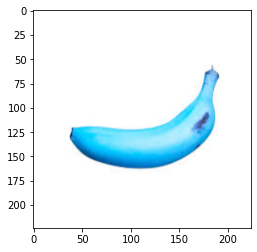

In [ ]:
IMG_SIZE = 224
classes = ['MANGA', 'BANANA']

img_test = cv2.imread('/content/banana.jpeg')
new_test = cv2.resize(img_test, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_test)
new_test = new_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)


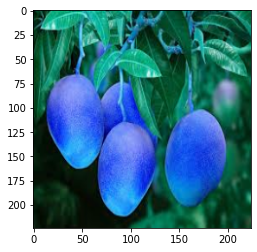

In [ ]:
IMG_SIZE = 224
classes = ['MANGA', 'BANANA']

img_grat = cv2.imread('/content/manga.jpeg')
new_grat = cv2.resize(img_grat, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_grat)
new_grat = new_grat.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
#prediction = model.predict(new_grat)
prediction = model.predict(new_test)
label = classes[np.argmax(prediction)]
print(label)

1/1 [==============================] - 0s 20ms/step
MANGA
